<a href="https://colab.research.google.com/github/Natalys2003/Machine-learn/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='unicode_escape')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
"""



'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html\n'

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
#приверка на пропуски. По результату кода, их нет
df_cluster = df.copy()
for col in df_cluster.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rank - 0%
Youtuber - 0%
subscribers - 0%
video views - 0%
category - 5%
Title - 0%
uploads - 0%
Country - 12%
Abbreviation - 12%
channel_type - 3%
video_views_rank - 0%
country_rank - 12%
channel_type_rank - 3%
video_views_for_the_last_30_days - 6%
lowest_monthly_earnings - 0%
highest_monthly_earnings - 0%
lowest_yearly_earnings - 0%
highest_yearly_earnings - 0%
subscribers_for_last_30_days - 34%
created_year - 1%
created_month - 1%
created_date - 1%
Gross tertiary education enrollment (%) - 12%
Population - 12%
Unemployment rate - 12%
Urban_population - 12%
Latitude - 12%
Longitude - 12%


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler

num_features = df_cluster.select_dtypes(include=['int']).columns
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["subscribers"].unique()



array([1.00000000e+00, 6.77696605e-01, 6.60507091e-01, 6.43317576e-01,
       6.30425440e-01, 4.58530297e-01, 4.28448646e-01, 4.24151268e-01,
       4.02664375e-01, 3.72152987e-01, 3.62698754e-01, 3.59690589e-01,
       3.49376880e-01, 3.33046841e-01, 3.20584443e-01, 3.03824667e-01,
       2.91362269e-01, 2.72024065e-01, 2.69445638e-01, 2.54834551e-01,
       2.53545337e-01, 2.50107434e-01, 2.40223464e-01, 2.32917920e-01,
       2.30339493e-01, 2.29050279e-01, 2.24752901e-01, 2.09282338e-01,
       2.02836270e-01, 2.01976794e-01, 1.98109153e-01, 1.96390202e-01,
       1.94671251e-01, 1.92952299e-01, 1.91663086e-01, 1.89514396e-01,
       1.81779115e-01, 1.79200688e-01, 1.77051998e-01, 1.76192523e-01,
       1.74473571e-01, 1.73614095e-01, 1.71465406e-01, 1.53846154e-01,
       1.52986678e-01, 1.51267727e-01, 1.50837989e-01, 1.48259562e-01,
       1.47400086e-01, 1.46110872e-01, 1.45251397e-01, 1.42672969e-01,
       1.41383756e-01, 1.39235067e-01, 1.38805329e-01, 1.38375591e-01,
      

In [7]:

#StandatdScaler

standard_scaler = StandardScaler()
st_scaler = df_cluster.copy()
st_scaler[num_features] = standard_scaler.fit_transform(df_cluster[num_features])
st_scaler["video views"].unique()

array([2.28000000e+11, 0.00000000e+00, 2.83688419e+10, 1.64000000e+11,
       1.48000000e+11, 9.32470405e+10, 2.90580444e+10, 9.04790600e+10,
       7.71801699e+10, 5.78562894e+10, 7.74284737e+10, 3.21445976e+10,
       2.41182306e+10, 1.01000000e+11, 2.62367902e+10, 2.08269940e+10,
       3.06081197e+10, 2.86345669e+10, 7.31390545e+10, 3.88432300e+10,
       3.67755859e+10, 4.57578502e+10, 2.86480244e+10, 6.15109065e+10,
       2.95332303e+10, 1.62415492e+10, 5.93164728e+10, 3.34318027e+10,
       5.72716308e+10, 4.06020202e+10, 2.53077535e+10, 2.88371445e+10,
       2.70738729e+10, 1.46960032e+10, 3.53022437e+10, 3.23124312e+10,
       3.03676767e+10, 3.05161727e+10, 2.98846573e+10, 2.40048426e+10,
       9.87736527e+09, 1.46317103e+10, 1.36263311e+10, 3.07886795e+10,
       2.25197052e+10, 1.93980457e+10, 2.72860588e+10, 2.29366308e+10,
       3.06863423e+10, 1.03233916e+10, 2.13887252e+10, 1.66021983e+10,
       7.82861083e+09, 4.11390504e+10, 1.07085318e+10, 2.54589520e+10,
      

In [16]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_cluster['subscribers_for_last_30_days'].unique()

df_cluster['subscribers_for_last_30_days']= label_encoder.fit_transform(df_cluster['subscribers_for_last_30_days'])

df_cluster['subscribers_for_last_30_days'].unique()


df_cluster['uploads'].unique()

df_cluster['uploads']= label_encoder.fit_transform(df_cluster['subscribers_for_last_30_days'])

df_cluster['uploads'].unique()

array([45, 53, 52, 36, 26, 32, 37, 33, 30, 35, 31, 29, 42, 34, 27, 13,  8,
       39,  0, 21, 14,  1,  2, 50, 44, 25, 46, 38,  5, 17,  3, 48, 40, 49,
        4, 10, 11, 51, 22, 28, 20, 47,  9, 19,  7, 23, 43, 18, 24, 16, 15,
        6, 41, 12])

In [17]:
df_cluster

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,45,India,IN,Music,...,45,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,53,United States,US,Games,...,53,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,52,United States,US,Entertainment,...,52,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,36,United States,US,Education,...,36,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,36,India,IN,Entertainment,...,36,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,33,Brazil,BR,Entertainment,...,33,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,29,India,IN,Games,...,29,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,20,United Kingdom,GB,Games,...,20,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,26,Sweden,SE,Games,...,26,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""


'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

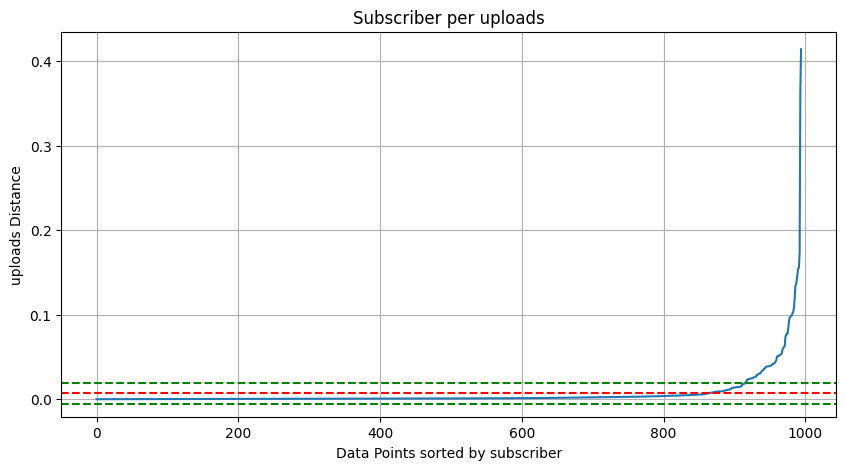

Оптимальный EPS = 0.007101662349133766


In [9]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score


upload = []
min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df[["subscribers","uploads"]])
df[["subscribers","uploadss"]] = min_max_scal
upload = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    upload.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
upload = sorted(upload)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(upload)), upload)
plt.title('Subscriber per uploads')
plt.xlabel('Data Points sorted by subscriber')
plt.ylabel('uploads Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(upload) + np.std(upload) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(upload), color='r', linestyle='--')
plt.axhline(y=np.mean(upload) - np.std(upload) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(upload)}')

In [10]:
np.mean(upload) + np.std(upload) / 2

0.019717746574919707

In [11]:
np.mean(upload)

0.007101662349133766

In [12]:
np.mean(upload) - np.std(upload) / 2

-0.005514421876652174

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


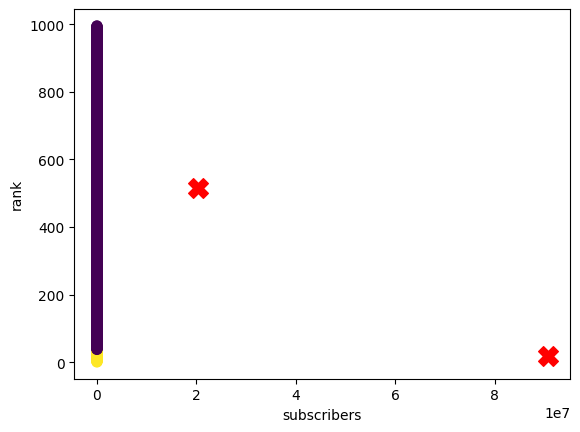

In [19]:
#k-means

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
X = df_cluster[["subscribers", "rank"]]
X
# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Визуализируем результаты кластеризации
plt.scatter(df["subscribers"], df["rank"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('subscribers')
plt.ylabel('rank')
plt.show()

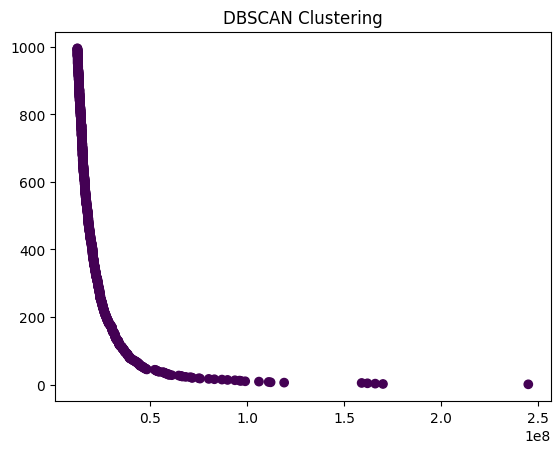

In [20]:
# метрики

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.0007695872, min_samples=2)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [ ]:
# выше

In [21]:
!pip install detectorusoutlierus==0.0.1b0

In [24]:
#detectorusoutlierus
from detectorusoutlierus import outliers as do

outlier_detector = do.Outline(df)
outliers_mean = outlier_detector.detect_outlier_mean_std('uploads')
outliers_mean

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,uploadss
4,5,SET India,0.630425,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,0.386767
11,12,WWE,0.359691,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,0.232742
15,16,Sony SAB,0.303825,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,0.236535
21,22,Zee TV,0.250107,7.313905e+10,Entertainment,Zee TV,129204,India,IN,Entertainment,...,2005.0,Dec,11.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,0.428810
26,27,Colors TV,0.224753,6.151091e+10,Shows,Colors TV,112915,India,IN,Entertainment,...,2008.0,Jun,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,0.374749
33,34,Aaj Tak,0.194671,2.530775e+10,News & Politics,Aaj Tak,283775,India,IN,News,...,2009.0,Aug,27.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,0.941810
56,57,HAR PAL GEO,0.138805,4.113905e+10,Entertainment,HAR PAL GEO,100755,Pakistan,PK,Entertainment,...,2008.0,Jan,2.0,9.0,2.165653e+08,4.45,79927762.0,30.375321,69.345116,0.334392
60,61,ABS-CBN Entertainment,0.137086,5.029254e+10,People & Blogs,ABS-CBN Entertainment,193890,Philippines,PH,Entertainment,...,2008.0,Jul,16.0,35.5,1.081166e+08,2.15,50975903.0,12.879721,121.774017,0.643494
65,66,ARY Digital HD,0.132789,3.793978e+10,Entertainment,ARY Digital HD,109871,Pakistan,PK,Entertainment,...,2016.0,Jul,11.0,9.0,2.165653e+08,4.45,79927762.0,30.375321,69.345116,0.364647
82,83,WorkpointOfficial,0.114740,3.613123e+10,Entertainment,WorkpointOfficial,72580,Thailand,TH,Entertainment,...,2012.0,Nov,5.0,49.3,6.962558e+07,0.75,35294600.0,15.870032,100.992541,0.240883


In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

'\nЗдесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?\n'

In [ ]:
# выше

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""


'\nЗдесь визуализация кластеров DBSCAN\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [ ]:
# выше

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

'\nЗдесь иерархическая кластеризация и метрики\n'

In [ ]:
# your_code here

In [25]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bd34e6b1e4ae91bd28faf991998fec9b7fa7a4a0cc9f5ef13b1d90a8143639b4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting unins

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров иерархической кластеризации\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [26]:
#PCA сжатие
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(995, 2)


,PC1,PC2
0,2.220176e+08,1835.088888
1,1.470176e+08,1048.283434
2,1.430176e+08,1007.267143
3,1.390176e+08,966.250852
4,1.360176e+08,935.738634


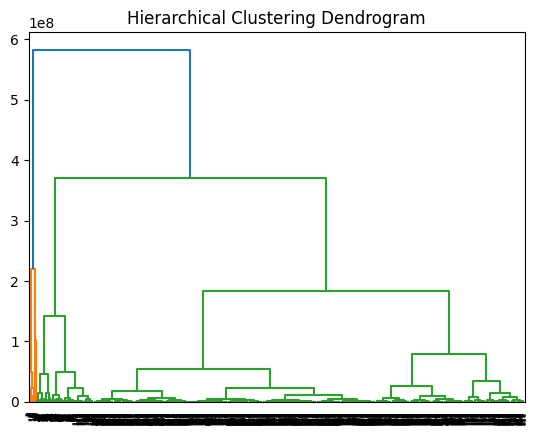

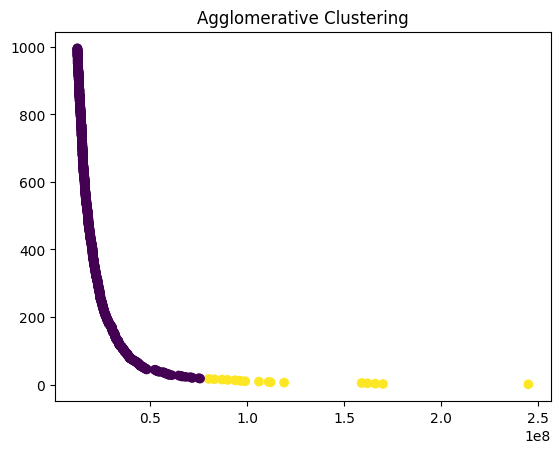

In [27]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X)


from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [29]:
"""Так как ,было выбранно 2 параметра, то  нет смысла делать эту часть задания. На графиках выше видна связь, как кластеры распределялись"""

'Так как ,было выбранно 2 параметра, то  нет смысла делать эту часть задания. На графиках выше видна связь, как кластеры распределялись'

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



'\nНа отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма\n\nfrom ydata_profiling import ProfileReport\n\nProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)\n\n'

Оптимальное число кластеров 3, с баллом 0.5344158443997531


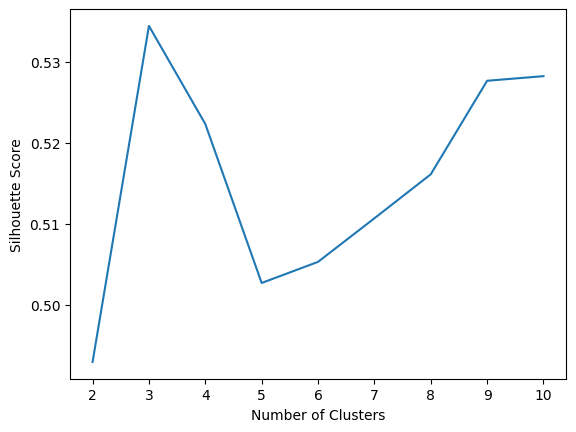

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поиск оптимального K
scores = []

for k in range(2, 11):
    kmeans = AgglomerativeClustering(n_clusters=k)
    kmeans.fit(X_scaled)

    score = silhouette_score(X_scaled, kmeans.labels_)

    scores.append(score)
    # scores2.append(mutual_info_score(X_scaled, kmeans.labels_))
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Оптимальное число кластеров 3, с баллом 0.5852479663918443


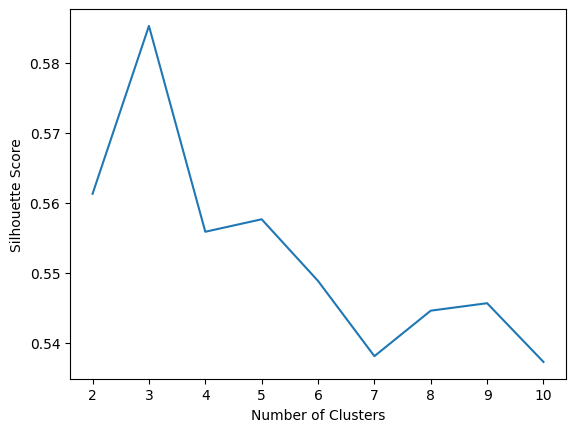

In [31]:
# from sklearn.metrics import mutual_info_score
from sklearn.metrics import silhouette_score
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Поиск оптимального K
scores = []
# scores2 = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)

    scores.append(score)
    # scores2.append(mutual_info_score(X_scaled, kmeans.labels_))
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Text(0.5, 1.0, 'Результат PCA (2 компоненты)')

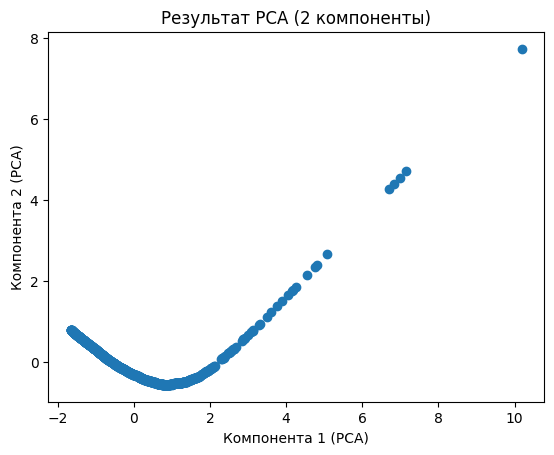

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Создаем объект PCA и снижаем размерность до 2 компонент
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_scaled)

# Восстановим данные обратно в исходное пространство (для демонстрации)
data_restored = pca.inverse_transform(data_pca)
plt.scatter(data_pca[:,0], data_pca[:,1])
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.title('Результат PCA (2 компоненты)')

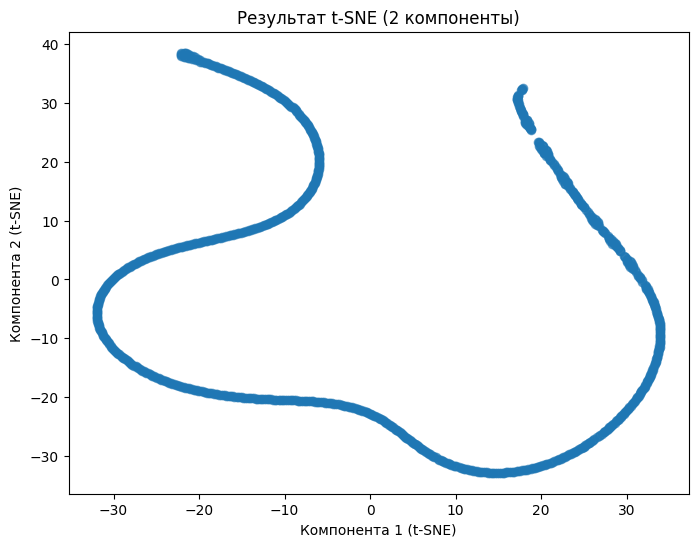

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Создаем объект t-SNE и снижаем размерность до 2 компонент
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(X_scaled)

# Визуализируем данные после применения t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.6)
plt.xlabel('Компонента 1 (t-SNE)')
plt.ylabel('Компонента 2 (t-SNE)')
plt.title('Результат t-SNE (2 компоненты)')
plt.show()

Видно, что параметры Dowry Deaths и Rape растут пропорционально на всех кластерах